# Exercise: Refactoring The Bad Boids

## Bad_Boids


We have written some _very bad_ code implementing our Boids flocking example.

Here's the [Github link](https://github.com/alan-turing-institute/bad-boids).

Please fork it on GitHub, and clone your fork.


``` bash
git clone      git@github.com:yourname/bad-boids.git 
# OR git clone https://github.com/yourname/bad-boids.git
```

For the Exercise, you should start from the GitHub repository, but here's our terrible code (the contents of the `boids.py` file):

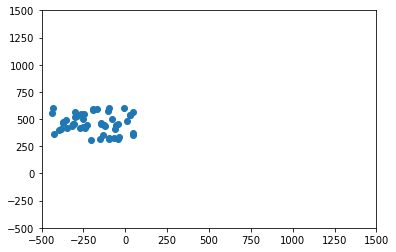

In [1]:
"""
A deliberately bad implementation of [Boids](http://dl.acm.org/citation.cfm?doid=37401.37406)
for use as an exercise on refactoring.
"""

from matplotlib import pyplot as plt
from matplotlib import animation
import random
import yaml

# Deliberately terrible code for teaching purposes

boids_x=[random.uniform(-450,50.0) for x in range(50)]
boids_y=[random.uniform(300.0,600.0) for x in range(50)]
boid_x_velocities=[random.uniform(0,10.0) for x in range(50)]
boid_y_velocities=[random.uniform(-20.0,20.0) for x in range(50)]
boids=(boids_x,boids_y,boid_x_velocities,boid_y_velocities)

def updateBoids(boids):
    xs,ys,xvs,yvs=boids
    deltaXVs=[0]*len(xs)
    deltaYVs=[0]*len(xs)
    # Fly towards the middle
    for i in range(len(xs)):
        for j in range(len(xs)):
            deltaXVs[i]=deltaXVs[i]+(xs[j]-xs[i])*0.01/len(xs)
    for i in range(len(xs)):
        for j in range(len(xs)):
            deltaYVs[i]=deltaYVs[i]+(ys[j]-ys[i])*0.01/len(xs)
    # Fly away from nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 100:
                deltaXVs[i]=deltaXVs[i]+(xs[i]-xs[j])
                deltaYVs[i]=deltaYVs[i]+(ys[i]-ys[j])
    # Try to match speed with nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 10000:
                deltaXVs[i]=deltaXVs[i]+(xvs[j]-xvs[i])*0.125/len(xs)
                deltaYVs[i]=deltaYVs[i]+(yvs[j]-yvs[i])*0.125/len(xs)
    # Update velocities
    for i in range(len(xs)):
        xvs[i]=xvs[i]+deltaXVs[i]
        yvs[i]=yvs[i]+deltaYVs[i]
    # Move according to velocities
    for i in range(len(xs)):
        xs[i]=xs[i]+xvs[i]
        ys[i]=ys[i]+yvs[i]


figure=plt.figure()
axes=plt.axes(xlim=(-500,1500), ylim=(-500,1500))
scatter=axes.scatter(boids[0],boids[1])

def ANIMATE(frame):
    updateBoids(boids)
    scatter.set_offsets(list(zip(boids[0],boids[1])))


anim = animation.FuncAnimation(figure, ANIMATE,
                               frames=50, interval=50)

if __name__ == "__main__":
    plt.show()

If you go into your folder and run the code:

``` bash
cd bad_boids
python boids.py
```


You should be able to see some birds flying around, and then disappearing as they leave the window.


In [2]:
from IPython.display import HTML

HTML(anim.to_jshtml())

## Your Task


Transform bad_boids **gradually** into better code, while making sure it still works, using a Refactoring approach.


### A regression test


First, have a look at the regression test we made (in the `record_fixture.py` file).

To create it, we saved out the before and after state
for one iteration of some boids, using ipython:


```python
from copy import deepcopy
import yaml
import boids

before = deepcopy(boids.boids)
boids.update_boids(boids.boids)
after = boids.boids
fixture = {"before": before, "after": after}
with open("fixture.yml", "w") as fixture_file:
    fixture_file.write(yaml.safe_dump(fixture))
```

### Invoking the test


Then, I used the fixture file to define the test (in `test_boids.py`):


```python
import os
import yaml
from nose.tools import assert_almost_equal
from boids import updateBoids


def test_bad_boids_regression():
    with open(os.path.join(os.path.dirname(__file__), "fixture.yml")) as fixture_file:
        regression_data = yaml.safe_load(fixture_file)

    boid_data = regression_data["before"]
    updateBoids(boid_data)
    for after, before in zip(regression_data["after"], boid_data):
        for after_value, before_value in zip(after, before):
            assert_almost_equal(after_value, before_value, delta=0.01)
```

### Make the regression test fail

Check the tests pass:

``` bash
pytest
```


Edit the file to make the test fail, see the fail, then reset it:


```
git checkout boids.py
```

### Start Refactoring


Look at the code, consider the lists of refactorings (in particular "Refactoring Summary" in the [07_03_refactoring notebook](./07_03_refactoring.html#refactoring-summary)), and make changes.

Each time, do a git commit on your fork, and write a commit message explaining the 
refactoring you did.

Try to keep the changes as small as possible.

If your refactoring creates any units, (functions, modules, or classes)
**write a unit test** for the unit: it is a good idea to get away from regression testing as soon as you can.